In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
.cm-s-ipython span.cm-comment{font-size:12pt; font-style:normal; color:orange;}
.ansi-yellow-bg{color:black;font-size:15pt;}

</style>
<style>
span.toc-item-num{display:none;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1을 사용하기

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()#  v2 비활성화하고 v1을 활성화

Instructions for updating:
non-resource variables are not supported in the long term


# Tensorflow
- 그래프를 정의(tensor객체의 흐름)
- sess = tf.Session()을 실행
- sess.run()을 통해 변수값을 확인할 수 있음

In [3]:
# tensor = data(상수,변수)와 연산
node1= tf.constant('Hello,Tensorflow')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1)).Decoding()

b'Hello,Tensorflow'
b'Hello,Tensorflow'


AttributeError: 'NoneType' object has no attribute 'Decoding'

In [ ]:
# 간단한 수학 연산 tensor 그래프
node1 = tf.constant(10,dtype = tf.float16)
node2 = tf.constant(20,dtype = tf.float16)
node3 = tf.add(node1,node2)
sess = tf.Session()
print(sess.run([node1,node2,node3]))

In [6]:
# 타입 변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]),dtype=tf.int16)
node2 = tf.cast(node1,dtype = tf.float32)
sess = tf.Session()
sess.run([node1,node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [ ]:
# 평균값 계산: tf.reduce_mean()
data = np.array([1.,2.,3.,4.])
m = tf.reduce_mean(data)
sess = tf.Session()
sess.run(m)

In [ ]:
# tf.random_normal([size]) : 평균 0이고, 표준편차가 1인 난수 size 개 발생, 난수갯수: 독립변수갯수
import matplotlib.pyplot as plt
tensor = tf.random_normal([1000]) # 평균 0 표준편차가 1인 난수 2(정규분포난수)
sess = tf.Session()
plt.hist(sess.run(tensor))
plt.show()

# 2.tensorflow v1 을 이용한 linear regression 을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [ ]:
# tensor 그래프(객체 흐름) 정의
# data set(x,y)
x = np.array([1,2,3])
y = np.array([1,2,3])

# w = weight와 bias(처음에는 랜덤값으로 셋팅했다가, 학습과정에서 변경)
W = tf.Variable([tf.random.normal([1])],name='weight')
b = tf.Variable(tf.random.normal([1]),name='bias')

# Hypothesis
H = W*x +b

# cost function (손실함수 = mse : 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 w랑 b를 구하는것
cost 함수는 2차함수이므로 곡선 그래프. 곡순위 미분값이 줄어드는 방향으로 학습(경사하강법)


'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# tf.Variable 변수 노드 (W,b)초기화
sess.run(tf.global_variables_initializer())
# 6000번 함수 (v2 에서의 fit 함수)
for step in range(0,6001):
    _, cost_val,W_val,b_val = sess.run([train,cost,W,b])
    if step%300==0:
        print("{}번째 cost:{},W:{},b:{}".format(step,cost_val,W_val,b_val))
    


In [ ]:
#최종적으로 나온 회귀식 H= W*x + b
sess.run([W,b])


In [ ]:
W_,b_ = sess.run([W,b])
W_,b_


In [ ]:
print('최종회귀식 : H = {}*x+{}'.format(W_[0],b_[0]))

In [ ]:
def to_predict(x):
    return W_[0]*x+b_[0]

In [ ]:
to_predict(3)

## 2.2 predict을 하기위한 placeholder 이용
- place


In [ ]:
a = tf.placeholder(tf.float16)
b = tf.placeholder(tf.float16)
ab = tf.add(a,b)
sess = tf.Session()
sess.run([a,b,ab], feed_dict ={a:10,b:20})

In [ ]:
sess.run(ab, feed_dict = {a:np.array([1,2,3]), b:np.array([1,2,3])})


In [ ]:
# data set
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])

# placeholder 설정(x,y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]),name='weight')
b = tf.Variable(tf.random.normal([1]),name = 'bias')
# Hypothesis
H = W*x + b
# cost function == Loss function
cost = tf.reduce_mean(tf.square(H-y))
#  경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# session 생성 & 변수초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습 6000번
for step in range(6000):
    _, cost_val,W_val,b_val = sess.run([train,cost,W,b],feed_dict={x:x_data,y:y_data})
    if step % 200 == 0:
        print("{}/6000번째 cost:{},W:{},b:{}".format(step+1,cost_val,W_val,b_val))
         

In [ ]:
# 최종 W,b
sess.run([W,b])

In [ ]:
#예측하기
sess.run(H, feed_dict={x:5})

In [ ]:
sess.run(H,feed_dict={x:np.array([5,6,7])})

## 2.3 scale 이 다른 데이터들 linear regression 구현

In [ ]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]),name = 'weight')
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
H = W*x +b
# cost function (loss function ; 손실함수)
cost=tf.reduce_mean(tf.square(H - y))
# 경사하강법
optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.01)
train= optimizer.minimize(cost)
# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range (1,6001):
        _, cost_val,W_val,b_val = sess.run([train, cost,W,b],
                                          feed_dict={x:x_data,y:y_data})
        
        if step%300==1:
            print("{}/6000번째 cost:{},W:{},b:{}".format(step,cost_val,W_val,b_val))

In [ ]:
# 예측 
sess.run(H, feed_dict={x:5})

In [ ]:
# cost값이 멈춤 :local 최소값


## 2.4 scale이 다른 데이터들의 linear regression을 구현(조정 o)
### scale을 맞추기
- normalization(정규화) : 데이터의 최대값을 1 , 최소값을 0으로 변환
                      x-Xmin
    normalization = ─────────── 
                    Xmax - Xmin
        * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.MinMaxScaler이용
- standardization(표준화) : 데이터의 평균을 0,표준편차를 1로 조정
                        x-Xmean(평균)
     standardization = ─────────────────
                        Xstd(표준편차)
                       * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.StandardScaler이용)

In [8]:
# 라이브러리를 쓰지않고 정규화 : 예측할 경우 x데이터의 스케일을 하고, 스케일된 예측값을 변환이 번거로움
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])


scaled_x_data = (x_data - x_data.min())/ (x_data.max()-x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max()-y_data.min())
print(scaled_x_data)
print(scaled_y_data)


[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.11111111 0.7        0.83333333 1.        ]


In [11]:
x = (5- x_data.min())/(x_data.max()-x_data.min())
x

0.4444444444444444

In [16]:
# 라이브러리를 쓰지않고 정규화 
x_data = np.array([1,2,5,8,10])
print('위의 x데이터:',x_data)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 표준화 시킬객체
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)
scaled_y = MinMaxScaler() # y_data를 표준화 시킬 객체
scaled_y.fit(y_data)
scaled_y_data= scaled_y.transform(y_data)
np.column_stack([x_data,scaled_x_data,y_data,scaled_y_data])

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]),name = 'weight')
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
H = W*x +b
# cost function (loss function ; 손실함수)
cost=tf.reduce_mean(tf.square(H - y))
# 경사하강법
optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.001)
train= optimizer.minimize(cost)
# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range (1,6001):
        _, cost_val,W_val,b_val = sess.run([train, cost,W,b],
                                          feed_dict={x:scaled_x_data,y:scaled_y_data})
        
        if step%300==1:
            print("{}/6000번째 cost:{},W:{},b:{}".format(step,cost_val,W_val,b_val))

위의 x데이터: [ 1  2  5  8 10]
1/6000번째 cost:0.24475941061973572,W:[0.6790333],b:[-0.25543872]
301/6000번째 cost:0.06408937275409698,W:[0.79443115],b:[-0.05908378]
601/6000번째 cost:0.023451710119843483,W:[0.8532046],b:[0.03155867]
901/6000번째 cost:0.014162952080368996,W:[0.88491565],b:[0.07235717]
1201/6000번째 cost:0.011911621317267418,W:[0.90356374],b:[0.08972309]
1501/6000번째 cost:0.011256897822022438,W:[0.91578823],b:[0.09613727]
1801/6000번째 cost:0.010979014448821545,W:[0.92474407],b:[0.09749367]
2101/6000번째 cost:0.010802561417222023,W:[0.9319399],b:[0.09657132]
2401/6000번째 cost:0.010663690976798534,W:[0.93810403],b:[0.094677]
2701/6000번째 cost:0.010546206496655941,W:[0.9435933],b:[0.09242138]
3001/6000번째 cost:0.01044477429240942,W:[0.94859],b:[0.09008661]
3301/6000번째 cost:0.010356731712818146,W:[0.9531918],b:[0.08780011]
3601/6000번째 cost:0.010280219838023186,W:[0.95745534],b:[0.0856162]
3901/6000번째 cost:0.010213697329163551,W:[0.9614181],b:[0.08355529]
4201/6000번째 cost:0.010155854746699333,W:[

In [20]:
# 예측
scaled_input=scaler_x.transform(np.array([[2]]))
print("2를 스케일 조정된 값:", scaled_input)
scaled_output =sess.run(H,feed_dict={x:scaled_input})
print('예측값:',scaled_y.inverse_transform(scaled_output))


2를 스케일 조정된 값: [[0.11111111]]
예측값: [[21.343945]]


In [28]:
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaled_y.inverse_transform(scaled_y_hat)
np.column_stack([y_data,y_hat])

array([[ 5.        , 11.51856041],
       [15.        , 21.34394455],
       [68.        , 50.82010269],
       [80.        , 80.29626465],
       [95.        , 99.94702911]])

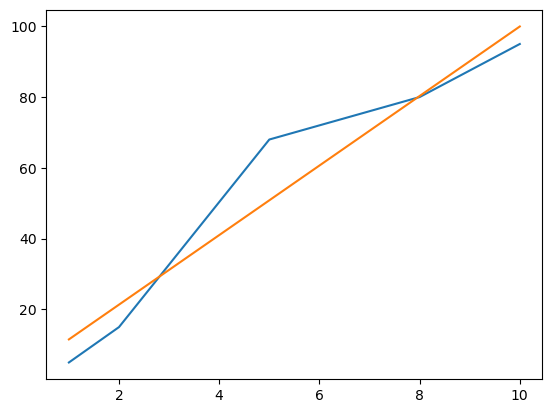

In [29]:
import matplotlib.pyplot as plt
plt.plot(x_data,y_data)
plt.plot(x_data,y_hat)

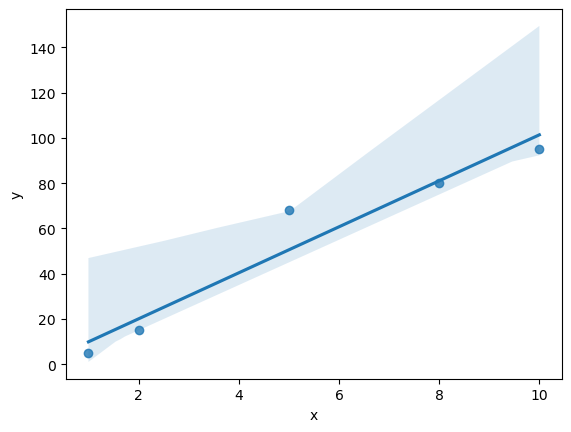

In [30]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x':x_data[:,0],'y':y_data[:,0]})
sns.regplot(data = df,x='x',y='y')
plt.show()

In [35]:
# 라이브러리를 쓰지 않고 표준화
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])
scaled_x_data = (x_data - x_data.mean()) / x_data.std()
scaled_y_data = (y_data - y_data.mean()) / y_data.std()
np.column_stack([scaled_x_data, scaled_y_data])

array([[-1.22474487, -1.32373476],
       [-0.93313895, -1.04563922],
       [-0.05832118,  0.42826713],
       [ 0.81649658,  0.76198177],
       [ 1.39970842,  1.17912508]])

In [48]:
# 라이브러리를 써서 표준화
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler_x= StandardScaler()
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)

scaler_y= StandardScaler()
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)

np.column_stack([x_data,scaled_x_data])
np.column_stack([y_data,scaled_y_data])

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]),name = 'weight')
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
H = W*x +b
# cost function (loss function ; 손실함수)
cost=tf.reduce_mean(tf.square(H - y))
# 경사하강법
optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.001)
train= optimizer.minimize(cost)
# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range (1,10000):
        _, cost_val,W_val,b_val = sess.run([train, cost,W,b],
                                          feed_dict={x:scaled_x_data,y:scaled_y_data})
        
        if step%1000==1:
            print("{}/10000번째 cost:{},W:{},b:{}".format(step,cost_val,W_val,b_val))


1/10000번째 cost:1.3072694540023804,W:[0.37781426],b:[-0.94692427]
1001/10000번째 cost:0.08393538743257523,W:[0.88907814],b:[-0.1278957]
2001/10000번째 cost:0.0616188645362854,W:[0.9581317],b:[-0.01727416]
3001/10000번째 cost:0.06121174618601799,W:[0.96745825],b:[-0.00233312]
4001/10000번째 cost:0.061204325407743454,W:[0.968718],b:[-0.00031512]
5001/10000번째 cost:0.06120418384671211,W:[0.9688861],b:[-4.2561314e-05]
6001/10000번째 cost:0.06120418384671211,W:[0.9688999],b:[-5.7414045e-06]
7001/10000번째 cost:0.06120418384671211,W:[0.9688999],b:[-7.68358e-07]
8001/10000번째 cost:0.061204176396131516,W:[0.9688999],b:[-9.6479155e-08]
9001/10000번째 cost:0.06120418384671211,W:[0.9688999],b:[-2.6548458e-08]


# 2.5 독립변수 x가 여러개인 linear regression

In [6]:
import pandas as pd
import numpy as np

csv를 array로 읽어오기

In [9]:
#  방법 1: csv -> 데이터프레임 -> 넘파이 배열
# 1.csv를 dataFrame 읽어와
data = pd.read_csv('data/ozone.csv')
# 2. 결측치대체 or 삭제
#data.fillna(value=data.mean(),inplace=True)
data.dropna(how='any',axis=0,inplace=True)
X = data[['Ozone','Solar.R','Wind','Temp']].values
y= data['Ozone'].values
X.shape,y.shape

((111, 4), (111,))

In [2]:
# 방법 2: csv -> 넘파이 배열
#data = np.loadtxt('data/ozone_nonan.csv',delimiter=',') NAN과 header 없어야함
data = np.genfromtxt('data/ozone.csv',delimiter=',',skip_header=1, missing_values='NA', filling_values= np.nan)
data

NameError: name 'np' is not defined

In [10]:
# data set
x_data = np.array([[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152], 
                   [185], [180],[196],[142]])

# tensor graph 정의
# shape = [None,3] : x_data([5,3]) 도 받고, 예측할때는 [1,3]). 3열만 고정
X = tf.placeholder(shape=[None, 3],dtype= tf.float32)
Y = tf.placeholder(shape = [None,1],dtype= tf.float32)
# weight & bias (weight 3개,bias 1개)
W = tf.Variable(tf.random.normal([3,1]),name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis
#H = W@x +b ; tf.matmul(X,W) - 행렬곱
H = tf.matmul(X,W)+b
# cost
cost = tf.reduce_mean(tf.square(H-Y))
#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)
# session 생성과 Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1,40001):
    _, cost_val = sess.run([train, cost],
                          feed_dict={X:x_data,
                                    Y:y_data})
    if step%5000==1:
        print('{}번째 cost:{}'.format(step,cost_val))
print('최종 cost:{}'.format(cost_val))

1번째 cost:133525.21875
5001번째 cost:0.5067671537399292
10001번째 cost:0.1954524964094162
15001번째 cost:0.17123699188232422
20001번째 cost:0.1668839156627655
25001번째 cost:0.16443580389022827
30001번째 cost:0.1625729501247406
35001번째 cost:0.16110797226428986
최종 cost:0.15995153784751892


In [12]:
sess.run(H,feed_dict={X:np.array([[73,80,77],[73,80,72]])})

array([[152.43643],
       [150.3647 ]], dtype=float32)

In [38]:
# csv 파일->데이터프레임->결측치-> 넘파이 배열 -> 머신러닝
# import statsmodels.api as sm
# sm.datasets.get_rdataset('airquality').data
data = pd.read_csv('data/ozone_nonan.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [39]:
data.mean(axis=0)

Ozone       42.129310
Solar.R    185.931507
Wind         9.957516
Temp        77.882353
Month        6.993464
Day         15.803922
dtype: float64

In [40]:
# 결측치 처리
# data.dropna(how='any',axis = 0) # any: 열에 결측치가 하나라도 있으면 그 행 삭제 (학습할때 잘나옴)
# 결측치 처리 방법 2 : 열별 평균값으로 대체
# data.fillna(value= data.mean())
# 결측치 처리 방법 3: 열별월별 평균값으로 대체
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
mean_data.loc[5,'Ozone']
def fill_nan(row):
    "row['Ozone']과 row['Solar.R']값이 결측치면 mean_data.loc[월, 열이름]으로 대체"
    # row = row.copy()
    pd.options.mode.copy_on_write = True
    if row.isna()['Ozone']:
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row.Month, 'Solar.R']
    return row
# data.loc[4], fill_nan(data.loc[4])
data = data.apply(fill_nan, axis = 1)
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]

In [41]:
data.loc[4],fill_nan(data.loc[4])

(Ozone       23.615385
 Solar.R    181.296296
 Wind        14.300000
 Temp        56.000000
 Name: 4, dtype: float64,
 Ozone       23.615385
 Solar.R    181.296296
 Wind        14.300000
 Temp        56.000000
 Name: 4, dtype: float64)

In [67]:
x_data = data[['Solar.R','Wind','Temp']].values
x_data = data.iloc[:,1:].values
y_data = data['Ozone'].values.reshape(-1,1)
y_data = data[['Ozone']].values
x_data.shape, y_data.shape

# tensorflow 구현
# 1. X,Y
X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# 2.독립변수 3개 , 종속변수 1개인 모델의 weight,bias
W = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
H = tf.matmul(X,W) +b
# 4. cost함수 = loss 함수= 손실함수
cost = tf.reduce_mean(tf.square(H-Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W,b 변수초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 15000):
    _, cost_val = sess.run([train,cost],feed_dict={X:x_data,Y:y_data})
    
    if step%2000==1:
        print("{}번째cost:{}".format(step,cost_val))
print("최종cost:{},W:{},b:{}".format(cost_val,sess.run(W),sess.run(b)))

1번째cost:241828.390625
2001번째cost:528.64990234375
4001번째cost:478.82781982421875
6001번째cost:466.2961120605469
8001번째cost:463.1341857910156
10001번째cost:462.32647705078125
12001번째cost:462.1103515625
14001번째cost:462.0428466796875
최종cost:462.02569580078125,W:[[ 0.05532011]
 [-3.5655549 ]
 [ 0.8593279 ]],b:[-0.3591283]


In [65]:
#MinMaxScaler 나 StandardScaler 을 이용하여 스케일 조정후 tensorflow 수행
# 주로 0~1 사이    주로 0근처 
data = pd.read_csv('data/ozone.csv')
# 결측치 처리
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
def fill_nan(row):
    "row['Ozone']과 row['Solar.R']값이 결측치면 mean_data.loc[월, 열이름]으로 대체"
    # row = row.copy()
    pd.options.mode.copy_on_write = True
    if row.isna()['Ozone']:
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row.Month, 'Solar.R']
    return row
# data.loc[4], fill_nan(data.loc[4])
data = data.apply(fill_nan, axis = 1)
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]

x_data = data[['Solar.R','Wind','Temp']].values
x_data = data.iloc[:,1:].values
y_data = data['Ozone'].values.reshape(-1,1)
y_data = data[['Ozone']].values
x_data.shape, y_data.shape
# 독립변수와 종속변수의 scale 조정
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaled_x_data=scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler()
scaled_y_data=scaler_y.fit_transform(y_data)


# tensorflow 구현
# 1. X,Y
X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# 2.독립변수 3개 , 종속변수 1개인 모델의 weight,bias
W = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
H = tf.matmul(X,W) +b
# 4. cost함수 = loss 함수= 손실함수
cost = tf.reduce_mean(tf.square(H-Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W,b 변수초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 15000):
    _, cost_val = sess.run([train,cost],feed_dict={X:scaled_x_data,Y:scaled_y_data})
    
    if step%2000==1:
        print("{}번째cost:{}".format(step,cost_val))
print("최종cost:{},W:{},b:{}".format(cost_val,sess.run(W),sess.run(b)))

1번째cost:1.3659323453903198
2001번째cost:1.1957169771194458
4001번째cost:1.048235297203064
6001번째cost:0.920447826385498
8001번째cost:0.8097211718559265
10001번째cost:0.7137759327888489
12001번째cost:0.6306234002113342
14001번째cost:0.5585585832595825
최종cost:0.5262702703475952,W:[[1.3497986 ]
 [0.11151223]
 [0.540616  ]],b:[-0.21107364]


In [68]:
# 예측하기(독립변수 118,8,72면 종속변수는 얼마?)
input_data =np.array([[118,8,72]])
sess.run(H, feed_dict={X :input_data})


array([[39.515816]], dtype=float32)

In [64]:
np.column_stack([x_data[:2],y_data[:2]])


array([[190. ,   7.4,  67. ,  41. ],
       [118. ,   8. ,  72. ,  36. ]])

In [61]:
np.column_stack([scaled_x_data[:2],scaled_y_data[:2]])

array([[0.55963303, 0.3       , 0.26829268, 0.23952096],
       [0.33944954, 0.33157895, 0.3902439 , 0.20958084]])

# 3. logistic Regression = Binary classification(binary 분류분석)
- logistic 회귀분석 vs 회귀분석
- logistic 회귀분석 : 기존의 회귀분석과는 다른 처리가 필요

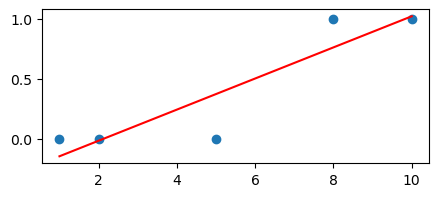

In [71]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))

x = np.array([1, 2, 5, 8, 10,40])
y = np.array([0, 0, 0, 1, 1,1]) # 실제값

lm = stats.linregress(x,y)
list(lm)
H = lm[0]*x+lm[1] # 예측값
plt.scatter(x,y)
plt.plot(x,H,'r')
plt.show()

In [85]:
# 교안 pt. 50
x_data = np.array([[10,0],
                   [8, 1],
                   [3, 3],
                   [2, 3],
                   [5, 1],
                   [2, 0],
                   [1, 0]])
y_data = np.array([[1],
                   [1],
                   [1],
                   [1],
                   [0],
                   [0],
                   [0]])

# X,y
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
y = tf.placeholder(shape=[None,1],dtype=tf.float32)
# 독립변수가 2개 , 종속변수가 1개인 weight & bias
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X,W) + b
H = tf.sigmoid(logits)
# cost 함수
#cost= tf.reduce_mean(tf.square(H-y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6000):
    _, cost_val = sess.run([train,cost],feed_dict={X:x_data,y:y_data})
    
    if step%600==1:
        print("{}번째cost:{}".format(step,cost_val))
print("최종cost:{}".format(cost_val))
                                  




1번째cost:1.9401994943618774
601번째cost:0.2345426082611084
1201번째cost:0.18538044393062592
1801번째cost:0.15915437042713165
2401번째cost:0.14050480723381042
3001번째cost:0.12591640651226044
3601번째cost:0.11400721967220306
4201번째cost:0.10405190289020538
4801번째cost:0.09559813886880875
5401번째cost:0.08833412826061249
최종cost:0.08205161243677139


In [92]:
# accuracy
predict =tf.cast(H>0.5,dtype= tf.float32)
# sess.run(predict,feed_dict={X:x_data})
correct = tf.equal(predict,y)
#sess.run(correct,feed_dict={X:x_data,y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print('모델의 정확도:', sess.run(accuracy,feed_dict={X:x_data,y:y_data})*100,'%')

모델의 정확도: 100.0 %


In [95]:
# 모델 사용하기 == 예측하기
input_data = np.array([[10,3]])
sess.run(predict,feed_dict={X:input_data})

array([[1.]], dtype=float32)

# 4.분류분석
- 종속변수가 2개이상
- 교안 54pt


In [104]:
x_data = np.array([[10,7, 8, 5],
                   [8, 8, 9, 4],
                   [7, 8, 2, 3],
                   [6, 3, 9, 3],
                   [7, 5, 7, 4],
                   [3, 5, 6, 2],
                   [2, 4, 3, 1]])
y_data = np.array([["A"],
                   ["A"],
                   ["B"],
                   ["B"],
                   ["B"],
                   ["C"],
                   ["C"]])
# 종속변수가 다중분류면 원핫 인코딩 ( 교안 58pt)
# 원핫인코딩방법1
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
labeled_y_data = encoder.fit_transform(y_data.ravel())
onehot_y_data = to_categorical(labeled_y_data)
onehot_y_data
#to_categorical(y_data)
# 원핫 인코딩방법 2
import pandas as pd
encoder = LabelEncoder()
labeled_y_data = encoder.fit_transform(y_data.ravel())
onehot_y_data = pd.get_dummies(labeled_y_data).values # pd.get_dummies의 결과 데이터프레임
onehot_y_data
# 원핫인코딩방법3
onehot_y_data = pd.get_dummies(y_data.ravel()).values
x_data.shape,onehot_y_data.shape

((7, 4), (7, 3))

In [105]:
x_data # 독립변수



array([[10,  7,  8,  5],
       [ 8,  8,  9,  4],
       [ 7,  8,  2,  3],
       [ 6,  3,  9,  3],
       [ 7,  5,  7,  4],
       [ 3,  5,  6,  2],
       [ 2,  4,  3,  1]])

In [106]:
onehot_y_data # 종속변수

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [123]:
# X,y
X = tf.placeholder(shape=[None,4],dtype=tf.float32)
Y = tf.placeholder(shape=[None,3],dtype=tf.float32)
# 독립변수가 4개 , 종속변수가 3개인 weight & bias
W = tf.Variable(tf.random_normal([4,3]))
b = tf.Variable(tf.random_normal([3]))
# Hypothesis
logits = tf.matmul(X,W) + b

# H = tf.sigmoid(logits)(이진 분류)일 경우
H = tf.nn.softmax(logits) #softmax : 종속변수들의 합이 1

# cost 함수
#cost= tf.reduce_mean(tf.square(H-y))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                             labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train,cost],feed_dict={X:x_data,Y:onehot_y_data})
    
    if step%1000==1:
        print("{}번째cost:{}".format(step,cost_val))
print("최종cost:{}".format(cost_val))
                                  



1번째cost:5.108121395111084
1001번째cost:1.0702459812164307
2001번째cost:0.05012881010770798
3001번째cost:0.0390341654419899
4001번째cost:0.0328034982085228
5001번째cost:0.02845670096576214
6001번째cost:0.02517475001513958
7001번째cost:0.02258734405040741
8001번째cost:0.020487839356064796
9001번째cost:0.0187472365796566
최종cost:0.01728086546063423


In [121]:
#예측하기
input_data = np.array([[10,7,8,5]])
y_hat = sess.run(H,feed_dict={X:input_data})
y_hat
print(y_hat.argmax(axis=1)) # argmax(axis=1) : 행별 최대값이 있는 index

[0]


In [124]:
# accuracy 측정
# H(예측값) : 0.99 0.005 0.005 -> H.argmax -> 0
# Y(실제값) : 1    0      0    -> Y.argmax -> 0

predict = tf.argmax(H, axis = 1)
# sess.run(predict,feed_dict={X:x_data})
correct = tf.equal(predict,tf.argmax(Y,axis =1))
# sess.run(correct,feed_dict={X:x_data,Y:onehot_y_data})
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print(sess.run(accuracy, feed_dict={X:x_data,Y:onehot_y_data})*100,'%')


100.0 %
